In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv('./Train_Test_Splits/Context/train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257012 entries, 0 to 257011
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           257012 non-null  int64  
 1   track_id          257012 non-null  object 
 2   hashtag           257012 non-null  object 
 3   created_at        257012 non-null  object 
 4   score             257012 non-null  float64
 5   lang              257012 non-null  object 
 6   tweet_lang        257012 non-null  object 
 7   time_zone         235202 non-null  object 
 8   instrumentalness  257004 non-null  float64
 9   liveness          257004 non-null  float64
 10  speechiness       257003 non-null  float64
 11  danceability      257003 non-null  float64
 12  valence           257002 non-null  float64
 13  loudness          257012 non-null  float64
 14  tempo             257012 non-null  float64
 15  acousticness      257004 non-null  float64
 16  energy            25

In [41]:
test_data = pd.read_csv('./Train_Test_Splits/Context/test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104334 entries, 0 to 104333
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           104334 non-null  int64  
 1   track_id          104334 non-null  object 
 2   hashtag           104334 non-null  object 
 3   created_at        104334 non-null  object 
 4   score             104334 non-null  float64
 5   lang              104334 non-null  object 
 6   tweet_lang        104334 non-null  object 
 7   time_zone         93516 non-null   object 
 8   instrumentalness  104329 non-null  float64
 9   liveness          104329 non-null  float64
 10  speechiness       104329 non-null  float64
 11  danceability      104329 non-null  float64
 12  valence           104328 non-null  float64
 13  loudness          104334 non-null  float64
 14  tempo             104334 non-null  float64
 15  acousticness      104329 non-null  float64
 16  energy            10

In [42]:
# 先做缺失值填充

# 一些音乐特性取平均值
lack_columns = ['instrumentalness', 'liveness', 'speechiness', 'danceability', 'valence', 'acousticness', 'energy']
for column in lack_columns:
    train_data[column] = train_data[column].fillna(value=train_data[column].mean())

# 音调和时区可简单取上一条记录的值
train_data = train_data.ffill()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257012 entries, 0 to 257011
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           257012 non-null  int64  
 1   track_id          257012 non-null  object 
 2   hashtag           257012 non-null  object 
 3   created_at        257012 non-null  object 
 4   score             257012 non-null  float64
 5   lang              257012 non-null  object 
 6   tweet_lang        257012 non-null  object 
 7   time_zone         257012 non-null  object 
 8   instrumentalness  257012 non-null  float64
 9   liveness          257012 non-null  float64
 10  speechiness       257012 non-null  float64
 11  danceability      257012 non-null  float64
 12  valence           257012 non-null  float64
 13  loudness          257012 non-null  float64
 14  tempo             257012 non-null  float64
 15  acousticness      257012 non-null  float64
 16  energy            25

### 探索性数据分析（EDA）
用训练集train_data完成一些数据分析
#### 单变量分析
* 时区（Time_zone）
 * 语言（Tweet_lang and lang）
 * 调式（Mode）
 * 音调（Key）
 * 推文标签（Hashtag）
 * 音乐情绪（Valence）
 
 ......

In [43]:
# 设置全局图表大小
plt.rc('figure', figsize=(12, 8))
plt.rc('axes', titlesize=18)  # 设置轴标题的字体大小
plt.rc('axes', labelsize=14)  # 设置轴标签的字体大小
plt.rc('xtick', labelsize=12)  # 设置x轴刻度标签的字体大小
plt.rc('ytick', labelsize=12)  # 设置y轴刻度标签的字体大小
plt.rc('legend', fontsize=12)  # 设置图例的字体大小

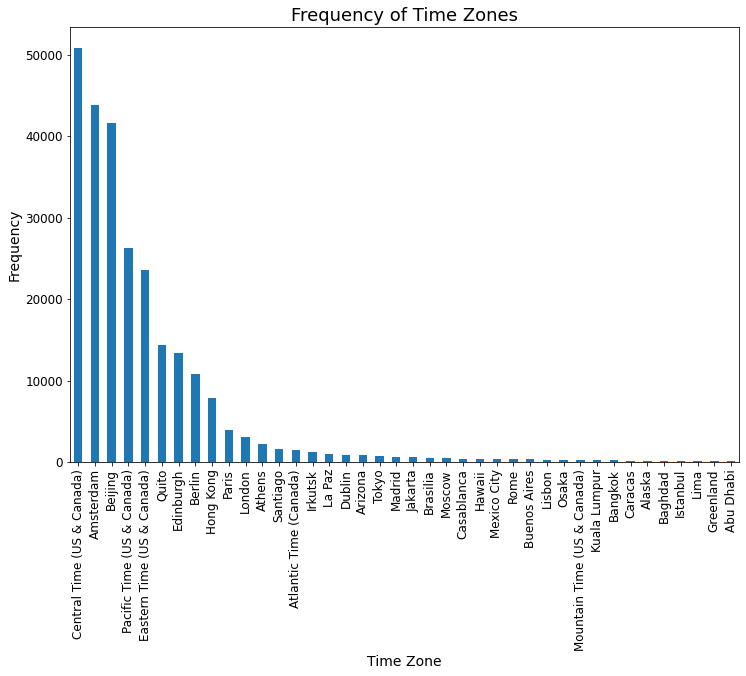

In [44]:
# 时区
time_zone_count = train_data['time_zone'].value_counts()
time_zone_count = time_zone_count[time_zone_count > 100]
time_zone_count.plot(kind='bar')
plt.xlabel('Time Zone')
plt.ylabel('Frequency')
plt.title('Frequency of Time Zones')
plt.show()

In [45]:
time_zone_view = time_zone_count[time_zone_count > 1000]
time_zone_view

time_zone
Central Time (US & Canada)    50876
Amsterdam                     43808
Beijing                       41638
Pacific Time (US & Canada)    26282
Eastern Time (US & Canada)    23555
Quito                         14332
Edinburgh                     13364
Berlin                        10788
Hong Kong                      7894
Paris                          3913
London                         3078
Athens                         2180
Santiago                       1632
Atlantic Time (Canada)         1491
Irkutsk                        1170
Name: count, dtype: int64

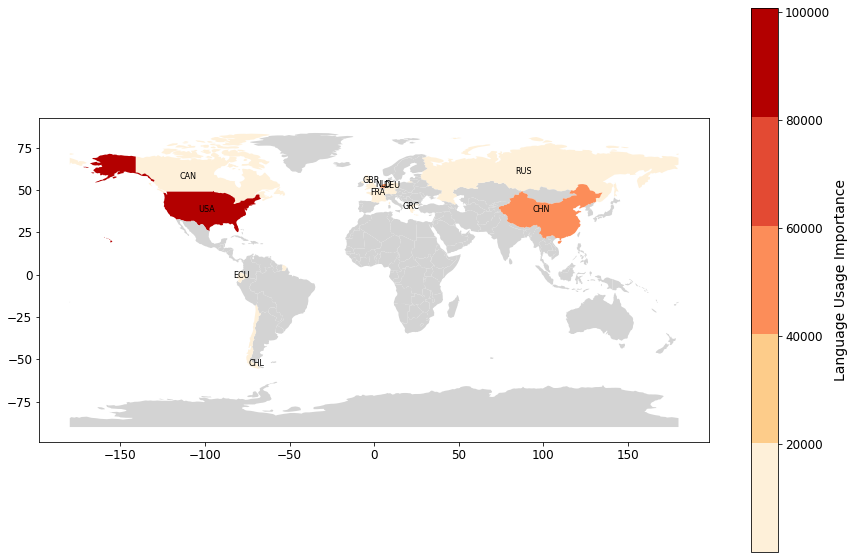

In [46]:
import geopandas as gpd
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.colorbar import ColorbarBase

country_importance = {'USA': 50876 + 26282 + 23555, 'NLD': 43808, 'CHN': 41638 + 7894, 'ECU': 14332,
                   'GBR': 13364 + 3078, 'DEU':10788, 'FRA':3913, 'GRC':2180, 'CHL':1632, 'CAN':1491, 'RUS':1170  }

# 加载世界地图
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['importance'] = world['iso_a3'].apply(lambda x: country_importance.get(x, 0))


# 定义一个自定义颜色映射
cmap = ListedColormap(['#fef0d9', '#fdcc8a', '#fc8d59', '#e34a33', '#b30000'])
# 确保0值以外的数据使用cmap，0值数据使用特定颜色（如灰色）
cmap.set_under('lightgrey')

# 绘制地图，颜色深浅表示重要程度
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='importance', ax=ax, legend=True,
           legend_kwds={'label': "Language Usage Importance"},
           cmap=cmap,
           vmin=0.0001)  # 使用颜色映射，深色表示高重要性

# 标注国家名称
for iso_a3, importance in country_importance.items():
    # 找到对应国家
    country = world[world['iso_a3'] == iso_a3]
    if not country.empty:
        # 计算国家的代表点（几何中心）
        repr_point = country.geometry.representative_point().values[0]
        # 在地图上标注国家ISO代码或名称
        plt.text(s=iso_a3, x=repr_point.x, y=repr_point.y, horizontalalignment='center', fontsize=8)

plt.show()

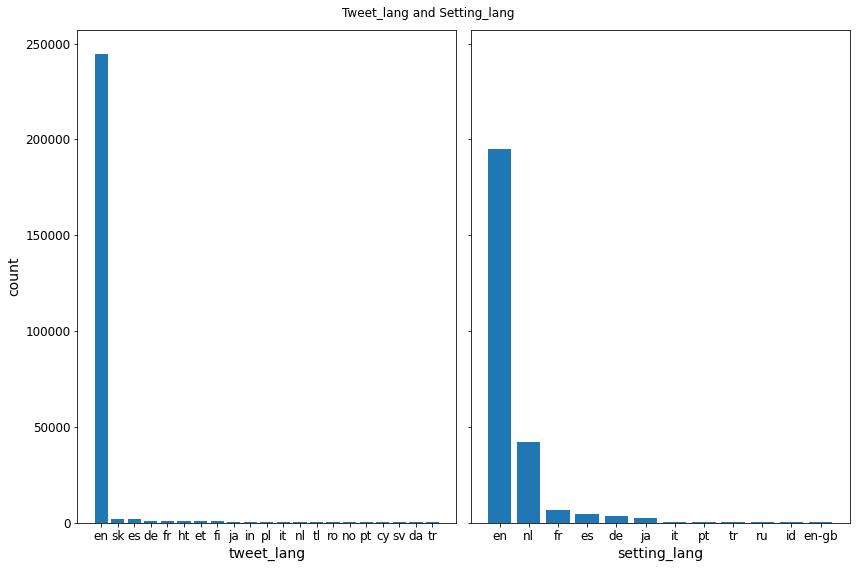

In [47]:
# 推文语言和推特界面语言
fig, axes = plt.subplots(1, 2, figsize=(12,8),sharey=True)
fig.suptitle('Tweet_lang and Setting_lang')
tweet_lang_count = train_data['tweet_lang'].value_counts()
tweet_lang_count = tweet_lang_count[tweet_lang_count > 100]
axes[0].bar(tweet_lang_count.index, tweet_lang_count.values)
axes[0].set_xlabel('tweet_lang')
axes[0].set_ylabel('count')

lang_count = train_data['lang'].value_counts()
lang_count = lang_count[lang_count > 100]
axes[1].bar(lang_count.index, lang_count.values)
axes[1].set_xlabel('setting_lang')

plt.tight_layout()
plt.show()

en - 英语 (English), 广泛使用于多个国家和地区。
nl - 荷兰语 (Dutch), 荷兰、比利时部分地区。
fr - 法语 (French), 法国、比利时、瑞士、加拿大部分地区等。
es - 西班牙语 (Spanish), 西班牙、拉丁美洲大部分国家。
de - 德语 (German), 德国、奥地利、瑞士部分地区等。
ja - 日语 (Japanese), 日本。
it - 意大利语 (Italian), 意大利。
pt - 葡萄牙语 (Portuguese), 葡萄牙、巴西。
tr - 土耳其语 (Turkish), 土耳其。
ru - 俄语 (Russian), 俄罗斯。
id - 印度尼西亚语 (Indonesian), 印度尼西亚。
en-gb / en-GB - 英国英语 (British English), 英国。
sv - 瑞典语 (Swedish), 瑞典。
pl - 波兰语 (Polish), 波兰。
no - 挪威语 (Norwegian), 挪威。
fi - 芬兰语 (Finnish), 芬兰。
hu - 匈牙利语 (Hungarian), 匈牙利。
cs - 捷克语 (Czech), 捷克共和国。
ca - 加泰罗尼亚语 (Catalan), 西班牙加泰罗尼亚地区。
eu - 巴斯克语 (Basque), 西班牙和法国的巴斯克地区。
zh-tw - 繁体中文 (Traditional Chinese), 主要在台湾、香港使用。
zh-Hans - 简体中文 (Simplified Chinese), 中国大陆。
ar - 阿拉伯语 (Arabic), 多个阿拉伯国家和地区。
da - 丹麦语 (Danish), 丹麦。
uk - 乌克兰语 (Ukrainian), 乌克兰。
ko - 韩语 (Korean), 韩国。
gl - 加利西亚语 (Galician), 西班牙加利西亚地区。
xx-lc - 不是标准的语言代码，可能是某个特定系统或数据集的特定标识。

**结论1：**
数据集以美国、荷兰、中国用户为主，推文主要使用英语

<Axes: ylabel='hashtag'>

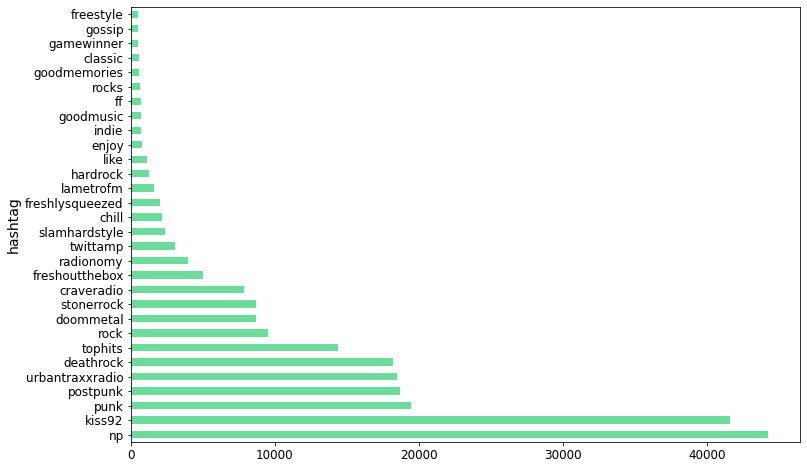

In [48]:
# valence 和 score（歌曲情感和用户使用的标签情绪评分）
hashtags = train_data['hashtag'].value_counts()
hashtags = hashtags[hashtags > 100][:30]
fig, axes = plt.subplots(1, 1)
hashtags.plot.barh(ax=axes, color='#2ecc71', alpha=0.7) # 翠绿

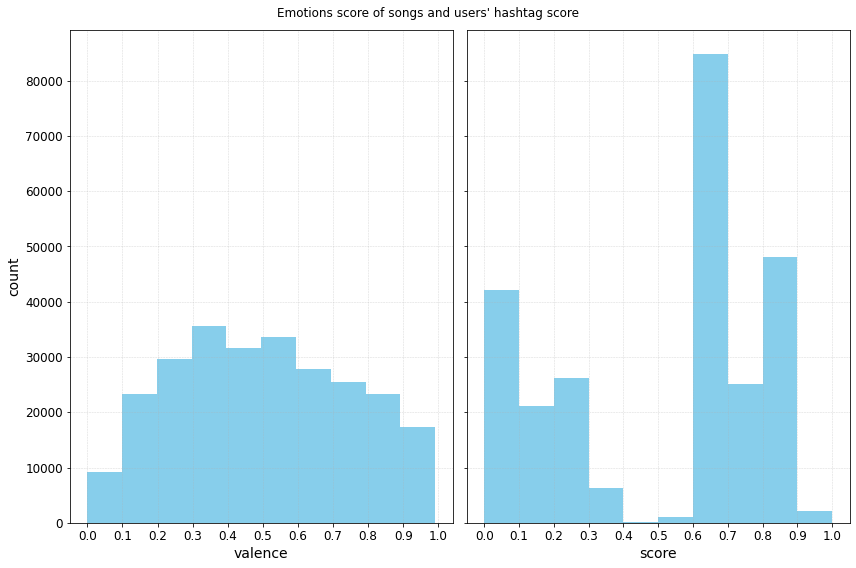

valence:(mean: 0.5013186053805029, std: 0.24727249251134936)
score:(mean: 0.5134263832857235, std: 0.3054589180627856)


In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
fig.suptitle("Emotions score of songs and users' hashtag score")

# 直方图和KDE曲线
axes[0].hist(train_data['valence'],color='skyblue')
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
axes[0].set_xlabel('valence')
axes[0].set_ylabel('count')

axes[1].hist(train_data['score'],color='skyblue')
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
axes[1].set_xlabel('score')

axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()
print(f"valence:(mean: {train_data['valence'].mean()}, std: {train_data['valence'].std()})")
print(f"score:(mean: {train_data['score'].mean()}, std: {train_data['score'].std()})")

**结论2：** 歌曲的情感几乎呈正态分布，用户情绪得分主要分布在两侧（0-0.4，0.6-1.0）即偏向于negtive或positive，在平静（neutral）时很少听音乐

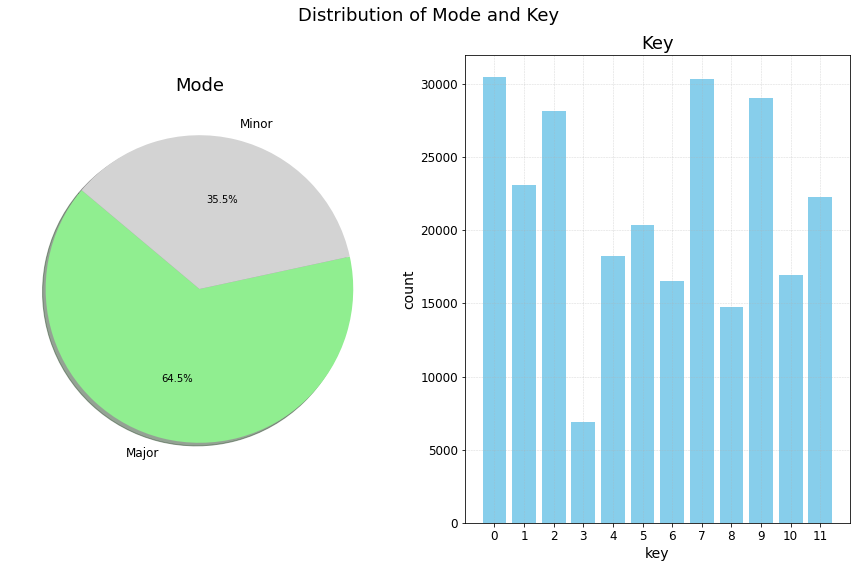

In [50]:
# 调式和音调
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Distribution of Mode and Key', fontsize=18)

# 条形图
modes = train_data['mode'].value_counts()
keys = train_data['key'].value_counts()

axes[0].set_title('Mode')
axes[0].pie(modes.values, labels=['Major', 'Minor'], colors=['lightgreen', 'lightgray'], autopct='%1.1f%%', shadow=True, startangle=140)

axes[1].bar(keys.index, keys.values, color='skyblue')
axes[1].set_title('Key')
axes[1].set_xlabel('key')
axes[1].set_ylabel('count')
axes[1].set_xticks([i for i in range(0, 12)])

axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

0: C
1: C# / Db
2: D
3: D# / Eb
4: E
5: F
6: F# / Gb
7: G
8: G# / Ab
9: A
10: A# / Bb
11: B

**结论3：** 用户收听的音乐以大调歌曲为主，且各调式中，以C、D、E、F、G、A、B居多，升调#降调b相对少

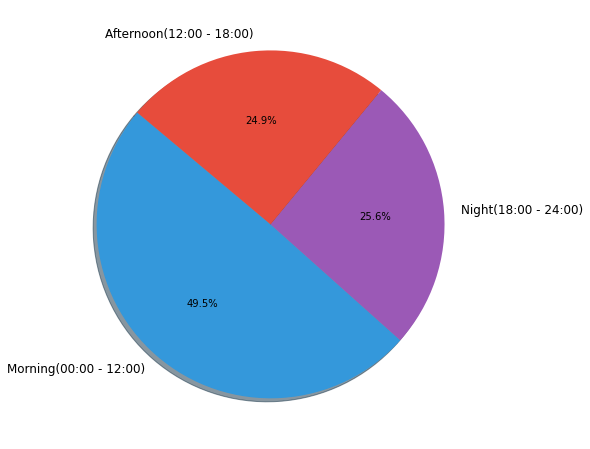

In [51]:
from datetime import datetime

created_time = train_data['created_at']
created_time = pd.to_datetime(created_time)

# 定义一个函数，根据时间判断属于早、中、晚哪个时段
def classify_time_period(time):
    if time.hour < 12:
        return 'Morning(00:00 - 12:00)'
    elif time.hour < 18:
        return 'Afternoon(12:00 - 18:00)'
    else:
        return 'Night(18:00 - 24:00)'

# 应用函数，创建一个新列来存储时段分类
period = created_time.apply(lambda x: classify_time_period(x))
period = period.value_counts()

fig, axes = plt.subplots(1, 1)
axes.pie(period.values, labels=period.index, autopct='%1.1f%%', shadow=True, startangle=140, colors=['#3498db', '#9b59b6', '#e74c3c'])
ax.set_ylabel('')
plt.show()

**结论4：** 听歌时间主要集中在0-12点（problem: 是哪个时区的时间？）

#### 双变量分析
* valence/score

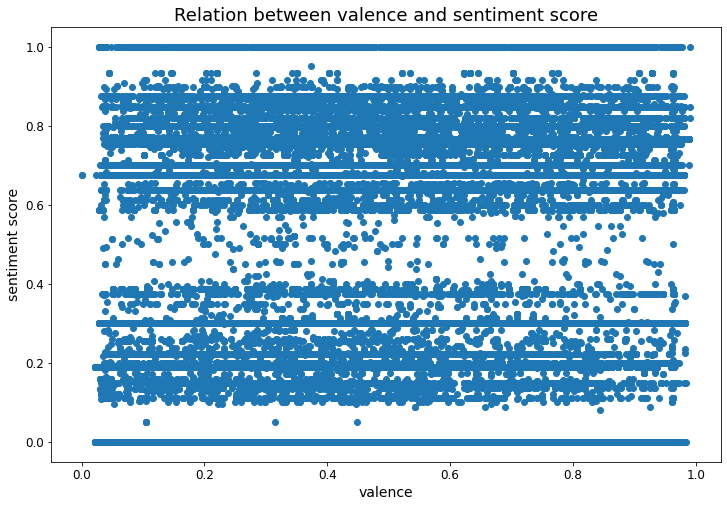

In [52]:
# valence and score
plt.scatter(train_data['valence'], train_data['score'])
plt.xlabel('valence')
plt.ylabel('sentiment score')
plt.title('Relation between valence and sentiment score')
plt.show()

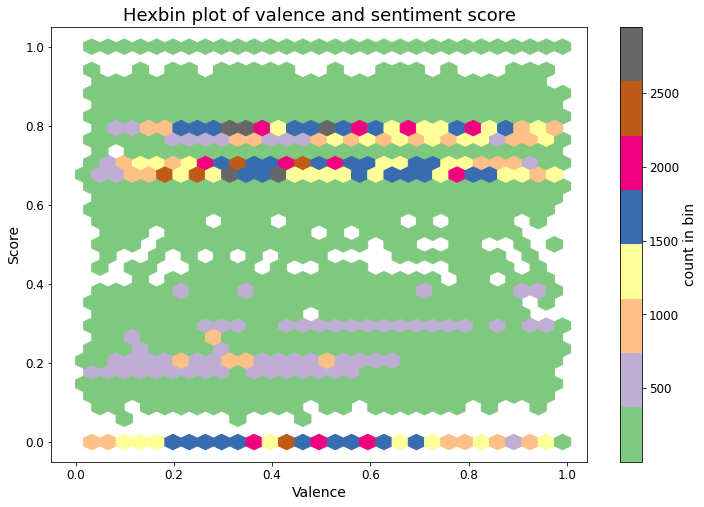

In [53]:
# 使用plt.hexbin来绘制六边形箱图
plt.hexbin(train_data['valence'], train_data['score'], gridsize=30, cmap='Accent', mincnt=1)
cb = plt.colorbar(label='count in bin')
plt.xlabel('Valence')
plt.ylabel('Score')
plt.title('Hexbin plot of valence and sentiment score')
plt.show()

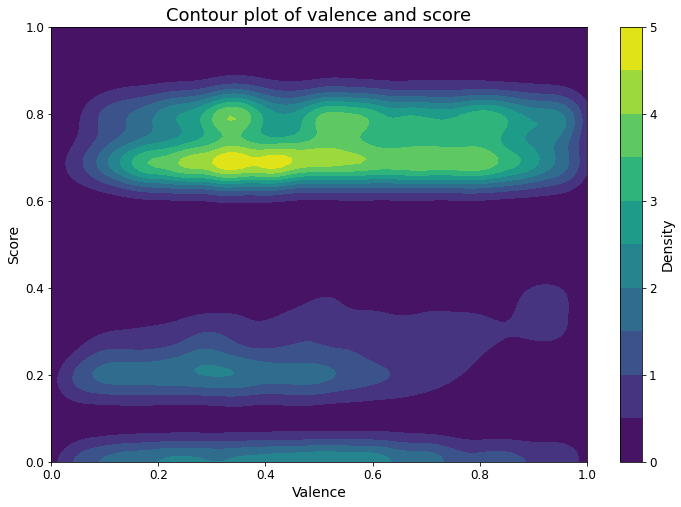

In [54]:
# 使用scipy.stats的gaussian_kde进行核密度估计
from scipy.stats import gaussian_kde

# 创建一个二维核密度估计
kde = gaussian_kde([train_data['valence'], train_data['score']])

# 创建一个网格来评估kde
valence_grid, score_grid = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
kde_values = kde(np.vstack([valence_grid.ravel(), score_grid.ravel()]))

# 绘制等高线图
plt.contourf(valence_grid, score_grid, kde_values.reshape(valence_grid.shape), levels=10, cmap='viridis')
plt.colorbar(label='Density')
plt.title('Contour plot of valence and score')
plt.xlabel('Valence')
plt.ylabel('Score')
plt.show()

In [55]:
# 计算Pearson相关系数和spearmanr相关系数
from scipy.stats import spearmanr

pearson_correlation_coefficient = np.corrcoef(train_data['valence'], train_data['score'])[0, 1]
print(f'pearson相关系数：{pearson_correlation_coefficient}')
# 计算Spearman相关系数
spearman_correlation_coefficient, p_value = spearmanr(train_data['valence'], train_data['score'])
print(f'spearman相关系数：{spearman_correlation_coefficient}')

pearson相关系数：0.1410010899937682
spearman相关系数：0.1297866489476894


**Pearson相关系数**：Pearson相关系数衡量的是两个连续变量之间的线性关系的强度和方向。

**Spearman相关系数**：Spearman相关系数衡量的是两个变量之间的单调关系的强度。

**结论5：** valence和sentiment score存在很弱的正相关性

#### 多变量分析

* 散点图矩阵分析（score与、Instrumentalness、livenes、speechiness等内容特征之间的关系）

In [56]:
train_data.describe()

,user_id,score,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,rating
count,2.570120e+05,257012.000000,257012.000000,257012.000000,257012.000000,257012.00000,257012.000000,257012.000000,257012.000000,257012.000000,257012.000000,257012.000000,257012.000000,257012.0
mean,6.933679e+08,0.513426,0.147182,0.185987,0.068740,0.55634,0.501319,-7.814153,122.813275,0.147196,0.707858,0.644904,5.369792,1.0
std,6.198599e+08,0.305459,0.278158,0.153402,0.065344,0.17489,0.247272,3.476082,27.617444,0.224338,0.193896,0.478543,3.612998,0.0
min,2.129130e+05,0.000000,0.000000,0.013600,0.021800,0.06220,0.000010,-60.000000,0.000000,0.000000,0.000020,0.000000,0.000000,1.0
25%,1.833648e+08,0.200000,0.000000,0.091500,0.034500,0.43400,0.305000,-9.688000,101.644000,0.003200,0.579000,0.000000,2.000000,1.0
50%,5.618076e+08,0.675000,0.000407,0.127000,0.045700,0.56900,0.494000,-7.205000,121.941000,0.037600,0.737000,1.000000,6.000000,1.0
75%,8.232143e+08,0.766667,0.111000,0.241000,0.072100,0.68300,0.702000,-5.255000,138.869000,0.185000,0.866000,1.000000,9.000000,1.0
max,2.830404e+09,1.000000,0.999000,0.993000,0.927000,0.98200,0.991000,-0.117000,240.056000,0.996000,0.999000,1.000000,11.000000,1.0


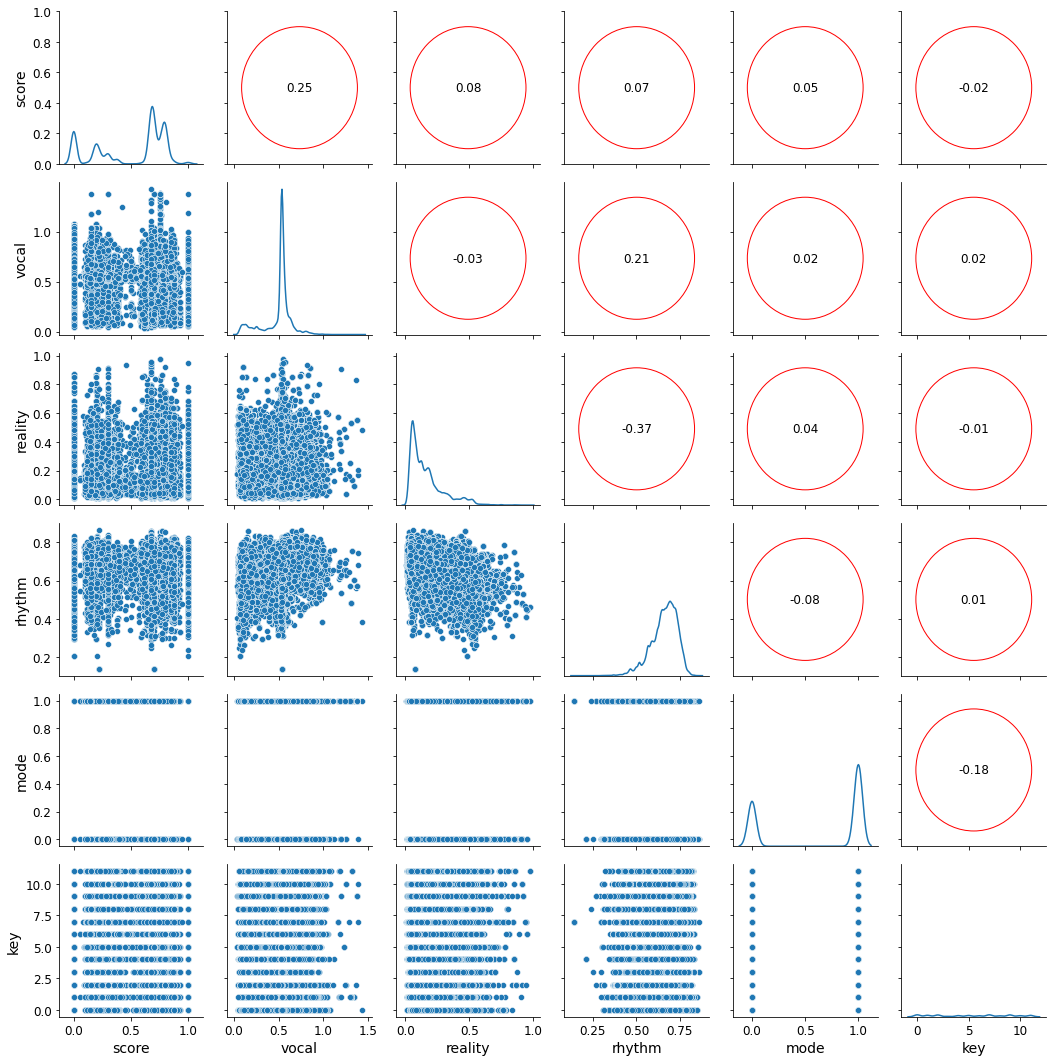

In [57]:
import seaborn as sns
from scipy import stats
from matplotlib.patches import Circle

# 先对 loudness、tempo等不同量纲特征归一化
train_data['loudness'] = (train_data['loudness'] - train_data['loudness'].min()) / (train_data['loudness'].max() - train_data['loudness'].min())
train_data['tempo'] = (train_data['tempo'] - train_data['tempo'].min()) / (train_data['tempo'].max() - train_data['tempo'].min())
train_data.describe()

# 内容特征太多，可以把相似的特征做一个组合，减少特征数量
# danceability、loudness、tempo、energy -> rhythm(律动) 各占25%权重
train_data['rhythm'] = train_data['danceability'] * 0.25 + train_data['loudness'] * 0.25 + train_data['tempo'] * 0.25 + train_data['energy'] * 0.25

# acousticness、liveness -> reality（真实性），各占50%
train_data['reality'] = train_data['acousticness'] * 0.5 + train_data['liveness'] * 0.5

# instrumentalness、speechiness -> vocal（人声），各占50%
train_data['vocal'] = (1 - train_data['instrumentalness']) * 0.5 + train_data['speechiness']

# 分析score、vocal、reality、rhythm、mode、key两两间的相关性
columns = ['score', 'vocal', 'reality', 'rhythm', 'mode', 'key']

# 初始化PairGrid
g = sns.PairGrid(train_data[columns])

# 对角线上绘制核密度分布，反映其分布特性
g.map_diag(sns.kdeplot)

# 下三角绘制散点图
g.map_lower(sns.scatterplot)

# 上三角显示相关系数的圆圈
def corrfunc(x, y, **kwargs):
    r, _ = stats.pearsonr(x, y)
    facecolor = sns.diverging_palette(240, 10, n=9, as_cmap=True)(0.5*(r+1))
    ax = plt.gca()
    ax.add_patch(plt.Circle((0.5, 0.5), size=np.abs(r)/2, transform=ax.transAxes, facecolor=facecolor, edgecolor='none'))
    ax.annotate(f"{r:.2f}", xy=(0.5, 0.5), xycoords=ax.transAxes, ha='center', va='center')

    
g.map_upper(corr)

plt.show()

**结论6：** 各特征之间没有太强的相关性，其中vocal与情绪得分score、vocal与rhythm有弱的正相关，reality和rhythm有稍强的负相关。其他的特征诸如key、mode、rhythm、reality都与情绪分数score没有太大关联